# Teoria do Caos

Arthur Souto Lima - 2018055113

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from numba import jit

sns.set_theme()
sns.set_palette("colorblind")

## Algoritmos

### Primeiras Tarefas

Primeiramente, temos que ter uma função que consiga nos dar o passo seguinte dado o passo atual.

In [2]:
@jit(nopython=True)
def evolve(x_n,r):
    """
    Faz um passo da evolução da população segundo o modelo do enunciado.
    No caso, a fórmula a ser usada é: x_{n+1} = r * x_n * (1 - x_n)
    
    Parâmetros:
        x_n: população da n-ésima geração
        r: fator que controle o processo
        
    Retorno:
        x_n1: população da geração seguinte
    """
    x_n1 = r * x_n * (1 - x_n)
    return x_n1

Para simular fazer 50 gerações, temos uma função que itera usando a função *evolve* e retorna a evolução desses valores ao longo da execução.

In [3]:
@jit(nopython=True)
def simulateN(N, x0, r):
    """
    Faz N gerações usando a função evolve, a partir dos parâmetros dados.
    
    Parâmetros:
        N: última geração
        x0: população inicial
        r: fator usado no modelo de evolução
    Retorno:
        xs: sequência de x_n's
    
    """
    xs = []
    xs.append(x0)
    x_n = x0
    for i in range(N):
        x_n1 = evolve(x_n, r)
        xs.append(x_n1)
        x_n = x_n1
    return xs

Para as primeiras tarefas, vamos analisar o comportamento após 50 gerações, para parâmetros fornecidos. Portanto, precisamos de funções para traçar os gráficos desses resultados.

In [4]:
def plotN(N, x0, r, axis=None):
    """
    Plota as N gerações com os parâmetros passados no eixo passado.
    
    Parâmetros:
        N: última geração
        x0: população inicial
        r: fator usado no modelo de evolução
        axis: eixo a ser plotados os dados
    Retorno:
        None
    """
    if (axis is None):
        axis = plt.gca()
    axis.plot(simulateN(N, x0, r))
    axis.set_title(f"N={N}, x0={x0}, r={r}")

Além disso, é interessante ter uma função que trace quatro desses gráficos numa matriz 2x2 a partir de um mesmo valor inicial. Isso facilita as análises.

In [5]:
def plotN_x0(N, x0, r0, r1, r2, r3, fig=None, ax=None):
    """
    Plota os gráficos de N gerações para esses quatro valores de r e um mesmo x0
    num grid 2x2
    
    Parâmetros:
        N: última geração
        x0: população inicial a ser usada em todos os gráficos
        r0: fator do gráfico 0,0
        r1: fator do gráfico 0,1
        r2: fator do gráfico 1,0
        r3: fator do gráfico 1,1
    Retorno:
        None
    
    """
    if (fig is None):
        fig, ax = plt.subplots(2,2, figsize=(12,5))
        fig.tight_layout()

    iterrows = [(ax[0,0], (N, x0, r0)),
                (ax[0,1], (N, x0, r1)),
                (ax[1,0], (N, x0, r2)),
                (ax[1,1], (N, x0, r3)),
               ]

    for axis, (N, x0, r) in iterrows:
        plotN(N, x0, r, axis=axis)

### Diagrama de Bifurcação

Semelhante à função *simulate* do contexto anterior, agora vamos simular da mesma forma, mas retornaremos apenas os últimos 100 valores, isto é, das últimas 100 gerações.

In [6]:
@jit(nopython=True)
def simulateN_last100(N, x0, r):
    """
    Faz N gerações usando a função evolve, a partir dos parâmetros dados,
    mas retorna apenas os últimos 100 valores, ou seja, apenas das últimas
    100 gerações.
    
    Parâmetros:
        N: última geração
        x0: população inicial
        r: fator usado no modelo de evolução
    Retorno:
        xs: sequência dos últimos 100 x_n's
    """
    xs = simulateN(N, x0, r)
    return xs[-100:]

Com esses valors das últimas gerações apenas, podemos traçar o diagrama de bifurcação.

In [7]:
def bifurcation_plot(x0, lb, ub, n):
    """
    Traça o diagrama de bifurcação para um espaço de 'n' fatores r 
    de 'lb' até 'ub', espaçados igualmente (np.linspace).
    
    Parâmetros:
        x0: população inicial para cada iteração
        lb: limite inferior (inclusivo) dos valores de r
        ub: limite superior (inclusivo) dos valores de r
        n: tamanho do vetor
    Retorno:
        plot: figura do matplotlib com o diagrama de bifurcação
    """
    rs = np.linspace(lb, ub, n)

    Xs = []
    Ys = []
    for r in rs:
        last100 = simulateN_last100(1000, x0, r)
        Xs.append(r)
        Ys.append(last100)
    plot = plt.plot(Xs, Ys, color='b')
    return plot

## Simulações

### Tarefa 1

*Faça gráficos de $ x_n $ como função de $ n $  para os seguintes valores de 𝑟: 0,5; 2,5; 3,1; 3,5 e 3,7.
Use $ x_0  = 0,5 $ e $ n $ entre 1 e 50. Comente sobre cada resultado. Em particular comente sobre
a existência de padrões.*

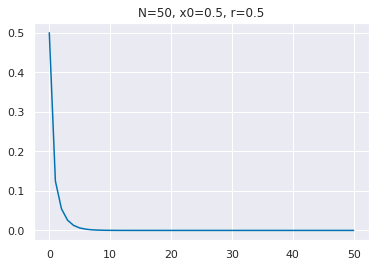

In [10]:
plotN(50, 0.5, 0.5)

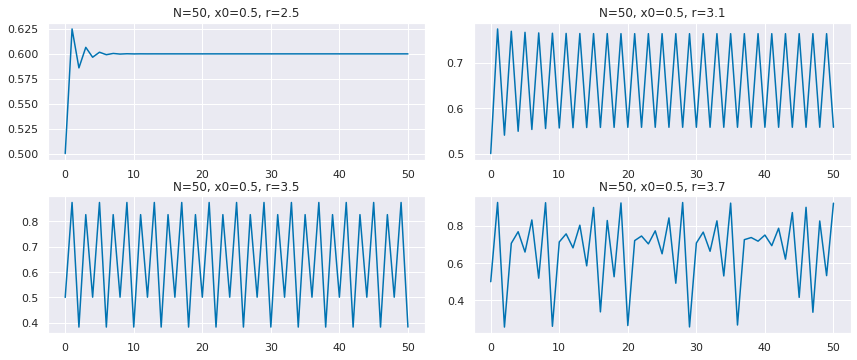

In [11]:
plotN_x0(50, 0.5, 2.5, 3.1, 3.5, 3.7)

**Comentários**:  \
Como já explanado pelo enunciado, com um fator menor que $1$, a população descresce. Com fator de $2.5$, vemos que há uma estabilização em $0.6$. A partir de $3$, há um padrão de periodicidade, sendo que quanto mais próximo de $3.9$ mais inconstante ficam as oscilações.

### Tarefa 2

*Refaça os gráficos anteriores considerando três condições iniciais consideravelmente
diferentes, ou seja, trace as curvas para $ x_0 = 0.25 $, $ x_0 = 0.5 $ e $ x_0 = 0.75 $. Comente.*

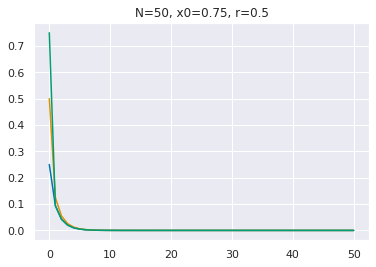

In [13]:
for x0 in [.25, .5, .75]:
    plotN(50, x0, 0.5)

Mantêm-se as observações da tarefa anterior, ou seja, com taxa $r$ negativa, a população decresce. Os valores iniciais são diferentes, por questões óbvias, já que esses são os parâmetros que estamos analisando nessa segunda tarefa.

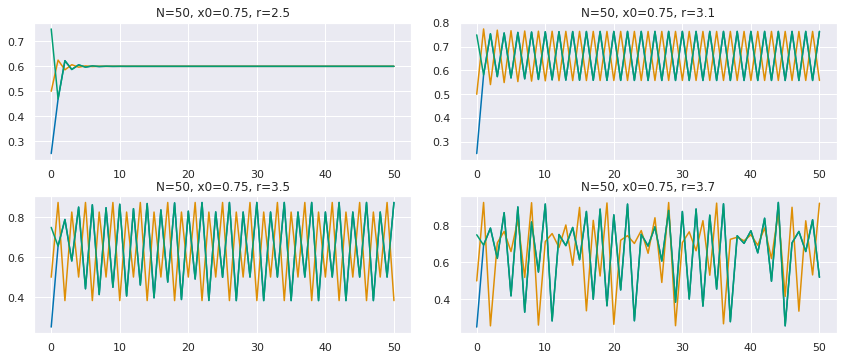

In [9]:
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()
plotN_x0(50, 0.25, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)
plotN_x0(50, 0.5, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)
plotN_x0(50, 0.75, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)

**Comentários**:   \
É possível notar que em todos os três valores iniciais, com fator de $2.5$, há uma estabilização em $0.6$. Nos outros fatores, o comportamento oscilatório se mantém, em torno do $0.6$ também. Nota-se que a frequência é semelhante para fatores iguais a partir de valores iniciais diferentes, quando, por exemplo, contamos os picos num mesmo intervalo. No $3.7$, as curvas são menos parecidas e bastante diferentes.

### Tarefa 3

*Refaça os gráficos anteriores considerando três condições iniciais ligeiramente diferentes, ou
seja, trace as curvas para $ x_0 = 0.5 $, $ x_0 = 0.501 $ e $ x_0 = 0.5001 $. Comente.*

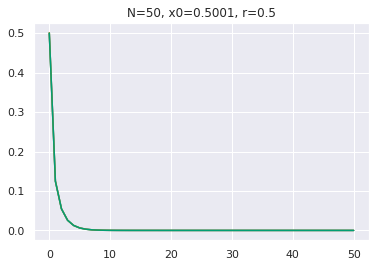

In [16]:
for x0 in [.5, .501, .5001]:
    plotN(50, x0, 0.5)

Os gráficos são praticamente coincidentes, com o mesmo resultado dos anteriores, isto é, sistema reduz a população com fator menor que $1$.

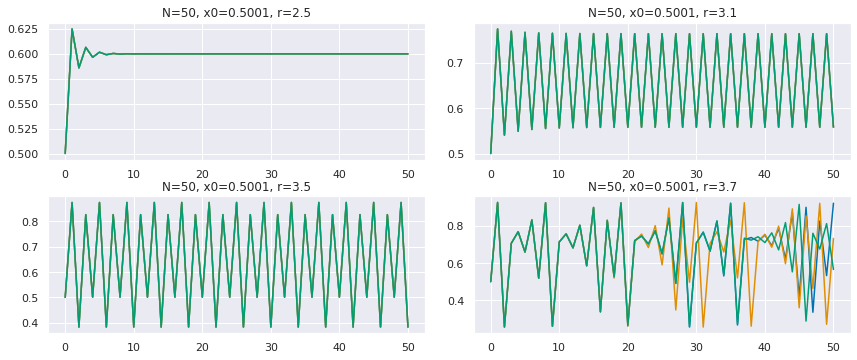

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()
plotN_x0(50, 0.5, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)
plotN_x0(50, 0.501, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)
plotN_x0(50, 0.5001, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)

**Comentários**:  \
À exceção do fator $3.7$, nos outros gráficos, as curvas são coincidentes, sendo que não há diferença visível. No $3.7$, por outro lado, nota-se que as curvas começam iguais, mas se diferenciam com o avanço das gerações. Essa diferença supreende,visto que os valores iniciais são muito próximos.

### Tarefas 4, 5 e 6

Seguindo as orientações do enunciado, conseguimos traçar o diagrama de bifurcação.

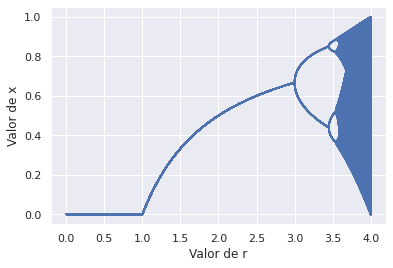

In [12]:
bifurcation_plot(0.5, 10**-5, 4, 30*10**3);
plt.xlabel("Valor de r"); plt.ylabel("Valor de x"); 

Além disso, com a modificação de parâmetros, podemos focar numa região específica, com orientação do enunciado.

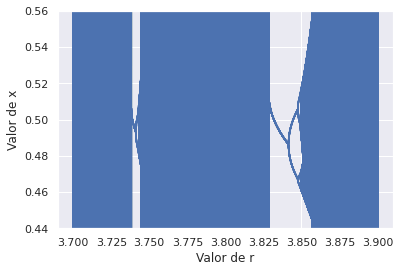

In [10]:
bifurcation_plot(0.5, 3.7, 3.9, 30*10**3);
plt.ylim(0.44, 0.56)
plt.xlabel("Valor de r"); plt.ylabel("Valor de x"); 

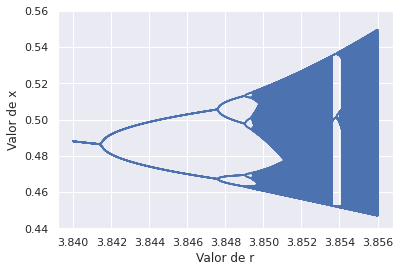

In [11]:
bifurcation_plot(0.5, 3.840, 3.856, 30*10**3);
plt.ylim(0.44, 0.56)
plt.xlabel("Valor de r"); plt.ylabel("Valor de x"); 

**Comentário**:  \
O diagrama de bifurcação é um gráfico muito importante no estudo do comportamento dos sistemas. Para cada valor de $r$, no eixo horizontal, temos os possíveis valores de x, no eixo vertical. Até um fator $r$ de $3.0$, aproximadamente, há apenas um valor de $x$ esperado, o que já vimos experimentalmente, de forma que os valores tendem a se estabilizar em um único quando o fator é menor que $3$. Além disso, fatores menores que $1$ tem apenas um valor: zero, o que também vimos nas simulações anteriores.

Para valores entre $3$ e $3.5$, vemos que há uma tendência para dois valores, o que foi observado nos gráficos desses fatores, com uma oscilação clara entre dois números, normalmente $0.4$ e $0.6$, aproximadamente. Com um fator maior, espera-se mais possibilidades de valores para $x$, ficando cada vez mais caótico. Próximo de $4$, há uma infinidade de valores, indicando comportamento caótico na região.

Quando fazemos um recorte de uma seção desse gráfico, vemos que há uma figura muito parecida com a inicial. Isso indica que há uma ramificação que se assemelha à uma recursão de uma árvore no diagrama de bifurcação.